<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">mIA3</h1></font>
<font color="#6E6E6E"><h2 align="left">Evaluación de Método de MonteCarlo</h2></font> 

#### Luis Enrique Palma

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Análisis de primer lanzamiento
A continuación se analiza el rendimiento del juego en el primer lanzamiento con la función *juego(se)*. En el que devuelve si se gana o pierde en el primer intento, caso contrario "pasa".

In [2]:
def juego(se):
    Gana=0
    Pierde=0
    Pasa=0
    gana=[7,11]
    pierde=[2,3,12]
    lanz=(np.random.choice(6, 1)+np.random.choice(6, 1)+2)
    if lanz in gana:
        Gana = 1
    elif lanz in pierde:
        Pierde = 1
    else:
        Pasa = 1
    return (Gana, Pierde, Pasa)
juego(99)

(0, 0, 1)

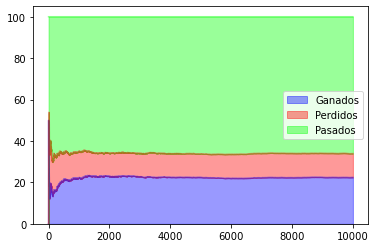

In [3]:
N = 10000
juegos = [juego(1) for i in range(N)]

#Convertir lista de tuplas a listas individuales
ganados = []
perdidos = []
pasados = []
for t in juegos:
    ganados.append(t[0])
    perdidos.append(t[1])
    pasados.append(t[2])

#Crear df para hacer un gráfico de áreas apiladas
df = pd.DataFrame({
    'Ganados': list(np.cumsum(ganados)*100/(np.arange(N)+1)),
    'Perdidos': list(np.cumsum(perdidos)*100/(np.arange(N)+1)),
    'Pasados': list(np.cumsum(pasados)*100/(np.arange(N)+1))},
    index=range(N))
ax = df.plot.area(colormap = "brg" ,alpha = 0.4)   

Para responder a quien tiene más probabilidad de ganar el juego en la primera tirada se hace uso del gráfico de áreas apiladas anterior en donde se observa que aproximadamente un 24% de los juegos se ganan, luego se pierden aproximadamente el 11% de los juegos y por último el 65% de los juegos pasan a la siguiente tirada.

### Juego completo
Ahora se considerará únicamente si se gana o pierde, considerando las tiradas después de la primera según sea el caso.

In [4]:
def juego_completo(se):
    Gana=0
    Pierde=0
    gana_1=[7,11]
    gana_2=[]
    pierde_1=[2,3,12]
    pierde_2=[7]
    contador=0
    lanz_2=0
    #Primer lanzamiento
    contador+=1
    lanz_1=(np.random.choice(6,1)+np.random.choice(6,1)+2)
    gana_2=[lanz_1]
    if lanz_1 in gana_1:
        Gana = 1
    elif lanz_1 in pierde_1:
        Pierde = 1
    #Si en el primer lanzamiento no gana o pierde    
    else:
        #Segundo lanzamiento
        contador+=1
        lanz_2=(np.random.choice(6,1)+np.random.choice(6,1)+2)
        if lanz_2 in gana_2:
            Gana=1
        elif lanz_2 in pierde_2:
            Pierde=1
        else:
            #Siguientes lanzamientos
            while lanz_2 not in gana_2+pierde_2:
                if lanz_2 in gana_2:
                    Gana=1
                    break
                elif lanz_2 in pierde_2:
                    Pierde=1
                    break
                else:
                    contador+=1
                    lanz_2=(np.random.choice(6,1)+np.random.choice(6,1)+2)
                    if lanz_2 in gana_2:
                        Gana=1
                        break    
                    elif lanz_2 in pierde_2:
                        Pierde=1
                        break
                    else:
                        pass                
    return (Gana, Pierde, contador, lanz_1, lanz_2)
juego_completo(99)

(0, 1, 7, array([5]), array([7]))

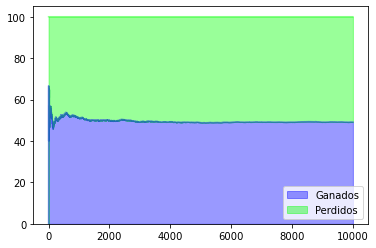

In [5]:
N = 10000
juegos = [juego_completo(1) for i in range(N)]

#Convertir lista de tuplas a listas individuales
ganados = []
perdidos = []
contador =[]
Lanz_1=[]
Lanz_2=[]
for t in juegos:
    ganados.append(t[0])
    perdidos.append(t[1])
    contador.append(t[2])
    Lanz_1.append(t[3])
    Lanz_2.append(t[4])

#Crear df para hacer un gráfico de áreas apiladas
df = pd.DataFrame({
    'Ganados': list(np.cumsum(ganados)*100/(np.arange(N)+1)),
    'Perdidos': list(np.cumsum(perdidos)*100/(np.arange(N)+1))},
    index=range(N))
ax = df.plot.area(colormap = "brg" ,alpha = 0.4) 

Según el gráfico de áreas apiladas anterior en el que se considera ganar o perder únicamente. Las probabilidades de ganar o perder son aproximadamente 49% de ganar y 51% de perder. 

En el dataframe *df_com* se guardaron los registros de cada una de las tiradas en el que Para Ganados y Perdidos son binarios {1,0} excluyentes. Contador representa la cantidad de veces que se tiraron los dados hasta que el juego finalizó y Lanz_1 el resultado de la primera tirada y Lanz_2 el resultado de la tirada con la que concluyó el juego. 

In [6]:
df_com = pd.DataFrame({
    'Ganados': ganados,
    'Perdidos': perdidos,
    'Contador': contador,
    'Lanz_1': Lanz_1,
    'Lanz_2': Lanz_2},
    index=range(N))

for j in ['Lanz_1', 'Lanz_2']:
    for i in range(len(df_com)):
        if df_com.loc[i,j] == 0:
            df_com.loc[i,j]=df_com.loc[i,j]
        else:
            df_com.loc[i,j]=df_com.loc[i,j][0]
df_com.head(10)

,Ganados,Perdidos,Contador,Lanz_1,Lanz_2
0,0,1,7,4,7
1,1,0,1,7,0
2,1,0,1,7,0
3,0,1,2,5,7
4,0,1,2,8,7
5,1,0,2,6,6
6,1,0,4,4,4
7,0,1,2,6,7
8,1,0,1,7,0
9,0,1,8,5,7
